# Credit Card Fraud Detection using Machine Learning (Imbalanced Dataset)

# 1: Fraud transaction
# 0: Normal transaction
# Dataset Link : https://www.kaggle.com/mlg-ulb/creditcardfraud

# Import All the required libraries

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from collections import Counter
import warnings

# Remove Warnings

In [ ]:
warnings.filterwarnings('ignore')

## Load dataset

In [ ]:
credit = pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Separate normal and fraud transaction

In [ ]:
fraud = credit.loc[credit['Class']==1]
normal = credit.loc[credit['Class']==0]

In [ ]:
print(f"Fraud transaction = {len(fraud)}")  
print(f"Normal transaction = {len(normal)}") 

Fraud transaction = 492
Normal transaction = 284315


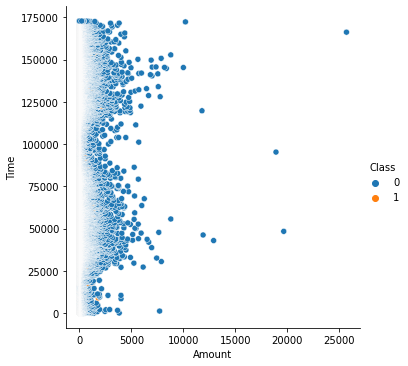

In [ ]:
sns.relplot(x="Amount",y="Time",hue="Class",data=credit)

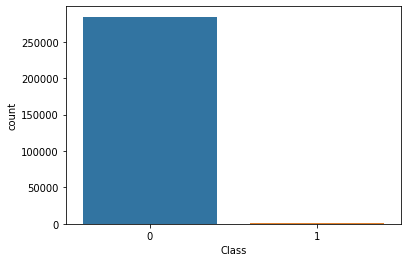

In [ ]:
sns.countplot(credit['Class'])

## Prepare data

In [ ]:
X = credit.drop("Class",axis=1)
Y = credit['Class']

## Split data into train and test

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [ ]:
Y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

# Handling Imabalanced dataset using over sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(0.75)
X_train_os , Y_train_os = ros.fit_sample(X_train , Y_train)

In [ ]:
print(f"The number of classes before fit : {Counter(Y_train)}")
print(f"The number of classes after fit : {Counter(Y_train_os)}")

The number of classes before fit : Counter({0: 227451, 1: 394})
The number of classes after fit : Counter({0: 227451, 1: 170588})


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_os , Y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Test a model

In [ ]:
pred = rfc.predict(X_test)

## Difference between the actual and predicted data

In [ ]:
fnl = pd.DataFrame(np.c_[Y_test,pred],columns=["Actual","Predicted"])
fnl

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
56957,0,0
56958,0,0
56959,0,0
56960,0,0


## Check Accuracy score, Classification report, Confusion matrix

In [ ]:
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))
print(accuracy_score(Y_test,pred))

[[56862     2]
 [   21    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

0.9995962220427653


# Handling Imabalanced dataset using under sampling

In [ ]:
from imblearn.under_sampling import NearMiss
us = NearMiss()
X_train_us , Y_train_us = us.fit_sample(X_train , Y_train)

In [ ]:
print(f"The number of classes before fit : {Counter(Y_train)}")
print(f"The number of classes after fit : {Counter(Y_train_us)}")

The number of classes before fit : Counter({0: 227451, 1: 394})
The number of classes after fit : Counter({0: 394, 1: 394})


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_us , Y_train_us)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Test a model

In [ ]:
pred = rfc.predict(X_test)

## Check Accuracy score, Classification report, Confusion matrix

In [ ]:
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))
print(accuracy_score(Y_test,pred))

[[35100 21764]
 [    5    93]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.76     56864
           1       0.00      0.95      0.01        98

    accuracy                           0.62     56962
   macro avg       0.50      0.78      0.39     56962
weighted avg       1.00      0.62      0.76     56962

0.6178329412590851


# ***Thank You!!!!!!!!!!!!!***